# Problem Statement
#### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

Note: 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.


* Dataset Link  : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
* Tutorial Link : https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

In [2]:
# Importing required libraries
import pandas
import numpy
import matplotlib


import sklearn
from sklearn import model_selection # for splitting into train and test
from sklearn import linear_model # for logistic model
from sklearn import discriminant_analysis # for LinearDiscriminantAnalysis model
from sklearn import tree # for decision tree
from sklearn import naive_bayes

In [3]:
dataset=pandas.read_csv('Data/train.csv')

# Summarize the Dataset

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Look at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.
5. Non

In [4]:
# 1. Dimensions of Dataset to see rows and cols count
print(dataset.shape)

(614, 13)


In [6]:
# 2. Look at the data itself.
display(dataset.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# 3. Statistical Summary
display(dataset.describe()) 
# it will identify numeric data automatically
# Count is excluded with NAs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# 4. Class Distribution
print(dataset.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


i.e. 31% Loan_status NO and 68% loan status YES

In [9]:
# we call also check the distribution by following way
print(dataset['Gender'].value_counts(), end='\n\n')
print(dataset['Married'].value_counts(), end='\n\n')
print(dataset['Education'].value_counts(), end='\n\n')
print(dataset['Self_Employed'].value_counts(), end='\n\n')
print(dataset['Property_Area'].value_counts(), end='\n\n')

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



# Data Visualization

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

 ### Univariate Plots

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
matplotlib.pyplot.show()

#layout=(row,col)

<Figure size 640x480 with 8 Axes>

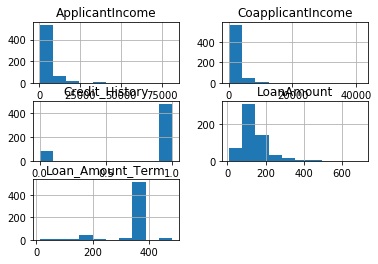

In [11]:
# histograms
dataset.hist()
matplotlib.pyplot.show()

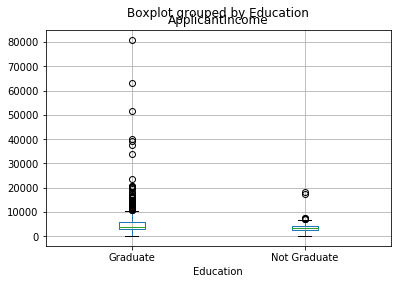

In [12]:
dataset.boxplot(column='ApplicantIncome', by = 'Education')
matplotlib.pyplot.show()

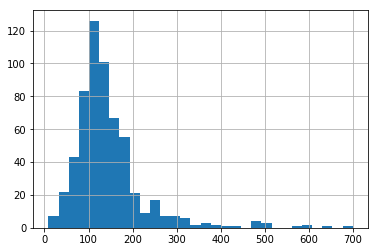

In [13]:
dataset['LoanAmount'].hist(bins=30) # 30 bins

In [14]:
# playing with categorical variable

In [15]:
temp1 = dataset['Credit_History'].value_counts(ascending=True)
temp2 = dataset.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('Frequency Table for Credit History:') 
display (temp1)

print ('\nProbility of getting loan for each Credit History class:')
display (temp2)

Frequency Table for Credit History:


0.0     89
1.0    475
Name: Credit_History, dtype: int64


Probility of getting loan for each Credit History class:


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


# Data Munging
Data Manupulating
i.e. Impute missing value

* There are missing values
* There are outliers

Tutorial : https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/


Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation



In [21]:
# Check missing values in the dataset
dataset.apply(lambda x: sum(x.isnull()),axis=0) # axis 0 means column wise. 1 means row wise.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
dataset.shape

(614, 13)

In [24]:
# filling NA by mean
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [27]:
# imputing Mode 
dataset['Self_Employed'].value_counts()

#~86% values are NO. It is same to impute NO

dataset['Self_Employed'].fillna('No',inplace=True)

In [ ]:
# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

# Let’s analyze LoanAmount first. 
# Since the extreme values are practically possible, 
# i.e. some people might apply for high value loans due to specific needs. 
# So instead of treating them as outliers, let’s try a log transformation to nullify their effect:


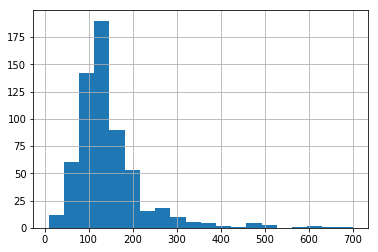

In [44]:
dataset['LoanAmount'].hist(bins=20)

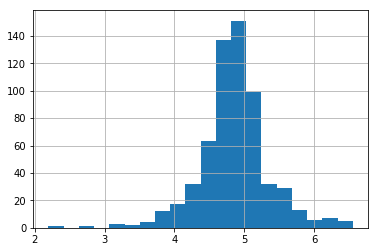

In [47]:
dataset['LoanAmount_log'] = numpy.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

# Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

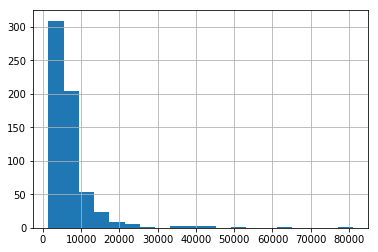

In [48]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome'].hist(bins=20)

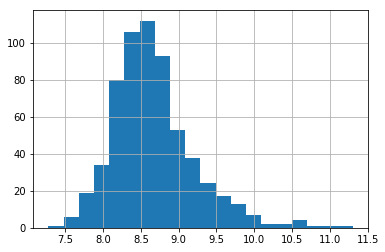

In [49]:
dataset['TotalIncome_log'] = numpy.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [50]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [51]:
# Check missing values in the dataset
dataset.apply(lambda x: sum(x.isnull()),axis=0) # axis 0 means column wise. 1 means row wise.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [52]:
display(dataset.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


In [62]:
# One hot encoding

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
dataset.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

# Build Models

Let’s evaluate 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [87]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [92]:
# Split-out validation dataset
X = dataset[['Gender','Married','Dependents','Education','Self_Employed','LoanAmount_log','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome_log']].values
Y = dataset['Loan_Status'].values

validation_size = 0.20
seed = 100
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [93]:
# Algorithms
model_LR=sklearn.linear_model.LogisticRegression()
model_LDA=sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
model_KNN= sklearn.neighbors.KNeighborsClassifier()
model_CART=sklearn.tree.DecisionTreeClassifier()
model_NB=sklearn.naive_bayes.GaussianNB()
model_SVM=sklearn.svm.SVC()

In [94]:
# Fitting Model
model_LR.fit(X_train,Y_train)
model_LDA.fit(X_train,Y_train)
model_KNN.fit(X_train,Y_train)
model_CART.fit(X_train,Y_train)
model_NB.fit(X_train,Y_train)
model_SVM.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
# Making Predictions

# for Train dataset
trainResult_LR=model_LR.predict(X_train)
trainResult_LDA=model_LDA.predict(X_train)
trainResult_KNN=model_KNN.predict(X_train)
trainResult_CART=model_CART.predict(X_train)
trainResult_NB=model_NB.predict(X_train)
trainResult_SVM=model_SVM.predict(X_train)


# for test dataset
testResult_LR=model_LR.predict(X_test)
testResult_LDA=model_LDA.predict(X_test)
testResult_KNN=model_KNN.predict(X_test)
testResult_CART=model_CART.predict(X_test)
testResult_NB=model_NB.predict(X_test)
testResult_SVM=model_SVM.predict(X_test)


In [98]:
#Combine result of all models
trainResult=pandas.DataFrame([Y_train,trainResult_LR,trainResult_LDA,trainResult_KNN,trainResult_CART,trainResult_NB,trainResult_SVM]).T
trainResult.columns=['Actual','LR','LDA','KNN','CART','NB','SVM']
display(trainResult.head(30))

,Actual,LR,LDA,KNN,CART,NB,SVM
0,0,1,1,1,0,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
5,0,1,1,1,0,1,1
6,0,1,1,1,0,1,1
7,1,1,1,1,1,1,1
8,0,1,1,1,0,1,1
9,0,0,0,0,0,0,0


### 3. Evaluation
1. Accuracy score
2. Confusion Matrix
3. Classification Report



#### Logistic Regression Evaluation

In [101]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_LR))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_LR))
print(sklearn.metrics.classification_report(Y_train, trainResult_LR))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_LR))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_LR))
print(sklearn.metrics.classification_report(Y_test, testResult_LR))

0.8268839103869654
[[ 64  80]
 [  5 342]]
             precision    recall  f1-score   support

          0       0.93      0.44      0.60       144
          1       0.81      0.99      0.89       347

avg / total       0.84      0.83      0.80       491

--------------------------------------------------------------
0.7317073170731707
[[18 30]
 [ 3 72]]
             precision    recall  f1-score   support

          0       0.86      0.38      0.52        48
          1       0.71      0.96      0.81        75

avg / total       0.76      0.73      0.70       123



#### Linear Discriminant Analysis (LDA) Evaluation

In [102]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_LDA))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_LDA))
print(sklearn.metrics.classification_report(Y_train, trainResult_LDA))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_LDA))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_LDA))
print(sklearn.metrics.classification_report(Y_test, testResult_LDA))

0.8289205702647657
[[ 64  80]
 [  4 343]]
             precision    recall  f1-score   support

          0       0.94      0.44      0.60       144
          1       0.81      0.99      0.89       347

avg / total       0.85      0.83      0.81       491

--------------------------------------------------------------
0.7317073170731707
[[18 30]
 [ 3 72]]
             precision    recall  f1-score   support

          0       0.86      0.38      0.52        48
          1       0.71      0.96      0.81        75

avg / total       0.76      0.73      0.70       123



#### K-Nearest Neighbors (KNN) Evaluation

In [103]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_KNN))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_KNN))
print(sklearn.metrics.classification_report(Y_train, trainResult_KNN))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_KNN))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_KNN))
print(sklearn.metrics.classification_report(Y_test, testResult_KNN))

0.8391038696537678
[[ 72  72]
 [  7 340]]
             precision    recall  f1-score   support

          0       0.91      0.50      0.65       144
          1       0.83      0.98      0.90       347

avg / total       0.85      0.84      0.82       491

--------------------------------------------------------------
0.6666666666666666
[[10 38]
 [ 3 72]]
             precision    recall  f1-score   support

          0       0.77      0.21      0.33        48
          1       0.65      0.96      0.78        75

avg / total       0.70      0.67      0.60       123



#### Classification and Regression Trees (CART) Evaluation

Decision tree has overfitted the training dataset. 100% accuracy in train dataset and low accuracy in test dataset.

In [104]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_CART))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_CART))
print(sklearn.metrics.classification_report(Y_train, trainResult_CART))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_CART))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_CART))
print(sklearn.metrics.classification_report(Y_test, testResult_CART))



1.0
[[144   0]
 [  0 347]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       144
          1       1.00      1.00      1.00       347

avg / total       1.00      1.00      1.00       491

--------------------------------------------------------------
0.6666666666666666
[[19 29]
 [12 63]]
             precision    recall  f1-score   support

          0       0.61      0.40      0.48        48
          1       0.68      0.84      0.75        75

avg / total       0.66      0.67      0.65       123



#### Gaussian Naive Bayes (NB) Evaluation

In [106]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_NB))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_NB))
print(sklearn.metrics.classification_report(Y_train, trainResult_NB))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_NB))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_NB))
print(sklearn.metrics.classification_report(Y_test, testResult_NB))

#### Support Vector Machines (SVM) Evaluation

0.8268839103869654
[[ 66  78]
 [  7 340]]
             precision    recall  f1-score   support

          0       0.90      0.46      0.61       144
          1       0.81      0.98      0.89       347

avg / total       0.84      0.83      0.81       491

--------------------------------------------------------------
0.7235772357723578
[[18 30]
 [ 4 71]]
             precision    recall  f1-score   support

          0       0.82      0.38      0.51        48
          1       0.70      0.95      0.81        75

avg / total       0.75      0.72      0.69       123



In [107]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_SVM))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_SVM))
print(sklearn.metrics.classification_report(Y_train, trainResult_SVM))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_SVM))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_SVM))
print(sklearn.metrics.classification_report(Y_test, testResult_SVM))

0.8391038696537678
[[ 69  75]
 [  4 343]]
             precision    recall  f1-score   support

          0       0.95      0.48      0.64       144
          1       0.82      0.99      0.90       347

avg / total       0.86      0.84      0.82       491

--------------------------------------------------------------
0.7235772357723578
[[17 31]
 [ 3 72]]
             precision    recall  f1-score   support

          0       0.85      0.35      0.50        48
          1       0.70      0.96      0.81        75

avg / total       0.76      0.72      0.69       123



In [109]:
# evaluate each model in turn
# cross validation
models = [model_LR,model_LDA, model_KNN,model_CART,model_NB,model_SVM]
names=['LR  ','LDA ','KNN ','CART','NB  ','SVM ']
for name,model in zip(names,models):
    kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
    cv_results_train = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_results_test = sklearn.model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring='accuracy')
    msg = "%s - %.2f %.2f" % (name,cv_results_train.mean(), cv_results_test.mean())
    print(msg)

LR   - 0.83 0.68
LDA  - 0.83 0.68
KNN  - 0.77 0.65
CART - 0.72 0.59
NB   - 0.82 0.65
SVM  - 0.82 0.67
